In [1]:
import numpy as np
import matplotlib.pyplot as plt

from grayscott import GrayScott
from constants import *

In [ ]:
def spatial_power_spectrum(field):
    f = field[1:-1, 1:-1]

    F = np.fft.fftshift(np.fft.fft2(f))
    P = np.abs(F)**2

    ny, nx = f.shape
    cy, cx = ny//2, nx//2
    Y, X = np.ogrid[:ny, :nx]
    r = np.sqrt((X - cx)**2 + (Y - cy)**2)
    r = r.astype(int)
    r_max = r.max()

    radial_ps = np.bincount(r.ravel(), weights=P.ravel()) / np.bincount(r.ravel())

    return radial_ps

def dominant_wavelength(radial_ps, dx):
    peak_index = np.argmax(radial_ps[1:]) + 1
    wavelength = 1 / peak_index * dx
    return wavelength

F=0.025, k=0.060: 100%|████████████████████████████████████████| 9830/9830 [00:14<00:00, 687.39it/s]


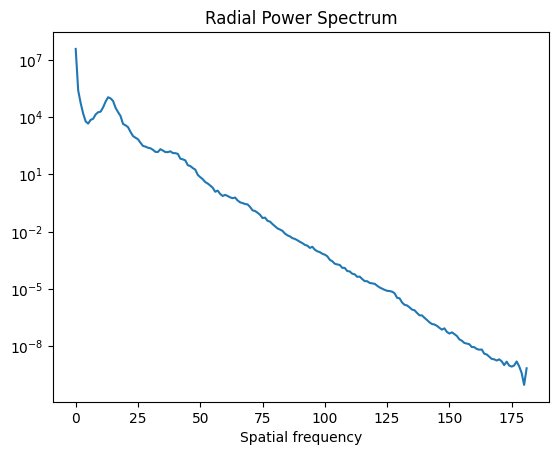

In [14]:
gs = GrayScott(F=0.025, k=k)
U, V = gs.forward(0, 6000)
radial_ps = spatial_power_spectrum(V)
plt.plot(radial_ps)
plt.yscale("log")
plt.title("Radial Power Spectrum")
plt.xlabel("Spatial frequency")
plt.show()

In [10]:
dominant_wavelength(radial_ps, 1e-5)

np.float64(1e-05)